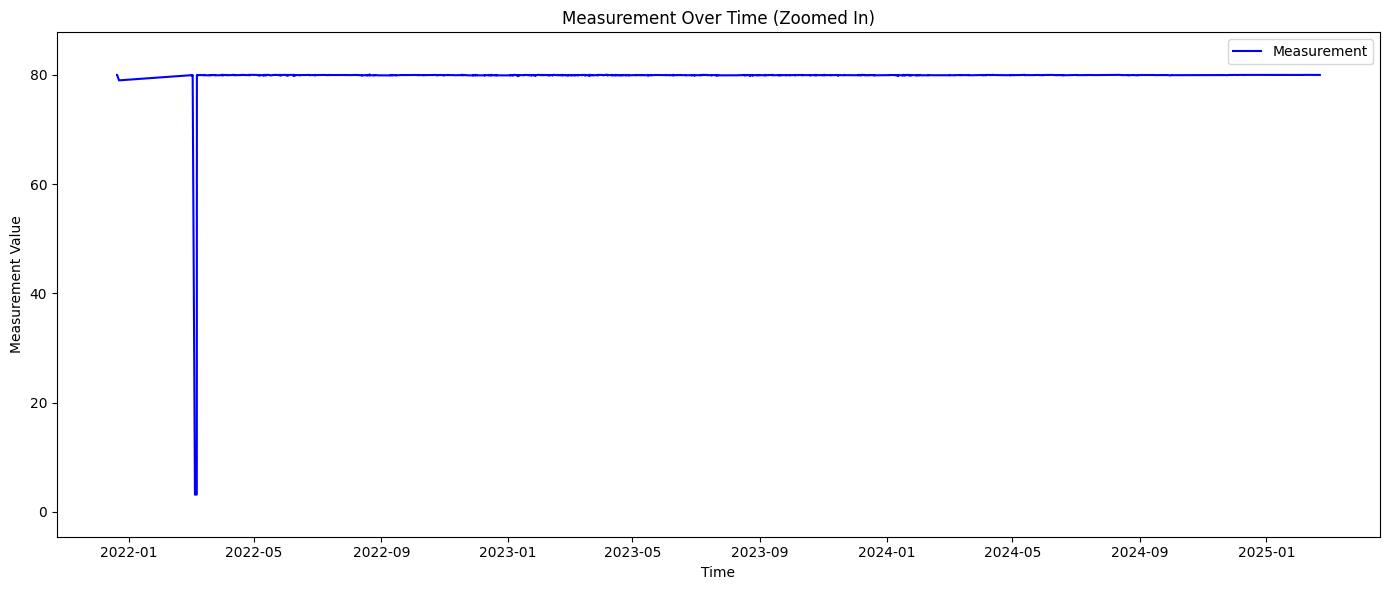

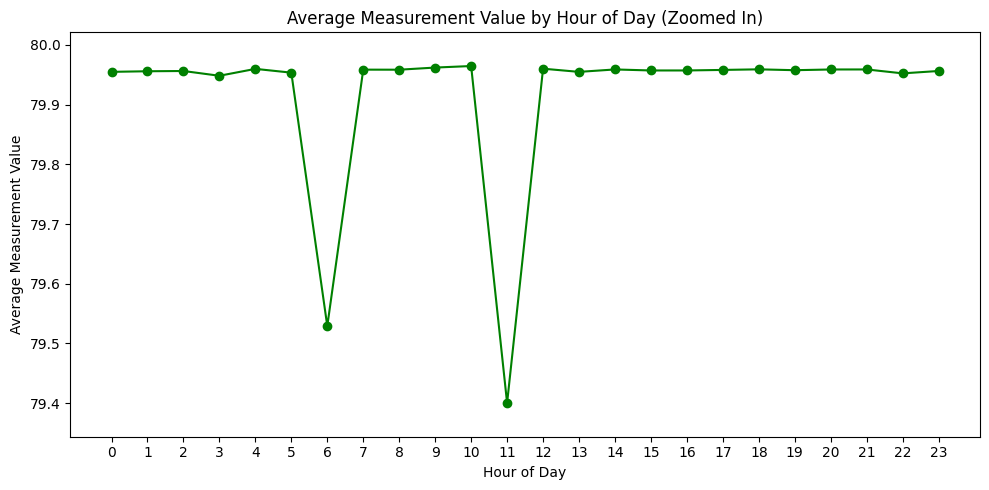

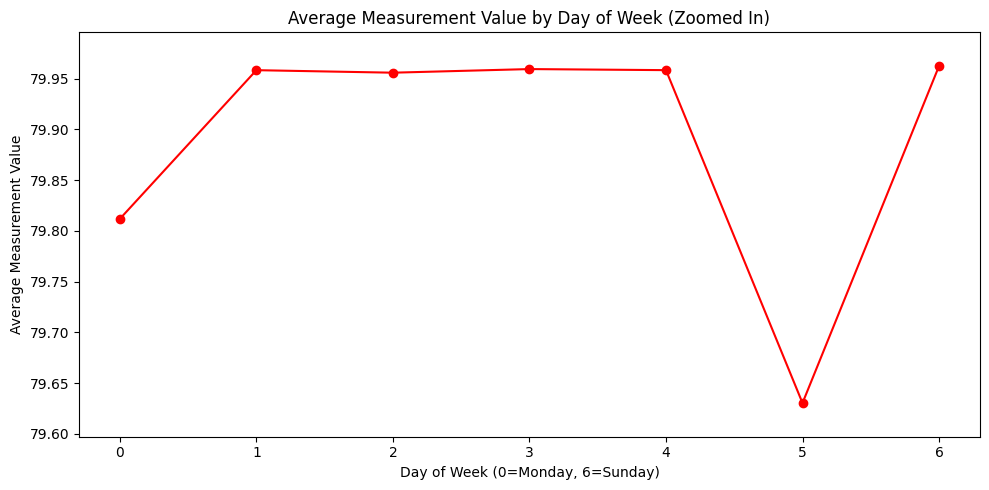

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"G:\College\University of Montana\Semester 4\Capstone\MSBA-Capstone-Riley-ORorke\data\Riley_O'Rorke_Capstone_Data.xlsx"
df = pd.read_excel(file_path)

# Convert the timestamp column to datetime
df['B.[EntryTimestamp]'] = pd.to_datetime(df['B.[EntryTimestamp]'])

# Sort by time (if not already sorted)
df = df.sort_values('B.[EntryTimestamp]')

# Calculate measurement range and add a small margin for zooming in
measurement_col = 'C.[DataValue]'
measurement_min = df[measurement_col].min()
measurement_max = df[measurement_col].max()
margin = 0.1 * (measurement_max - measurement_min)  # 10% margin

# --- Chart 1: Measurement Over Time (Zoomed Y-axis) ---
plt.figure(figsize=(14, 6))
plt.plot(df['B.[EntryTimestamp]'], df[measurement_col], color='blue', label='Measurement')
plt.xlabel('Time')
plt.ylabel('Measurement Value')
plt.title('Measurement Over Time (Zoomed In)')
plt.ylim(measurement_min - margin, measurement_max + margin)
plt.legend()
plt.tight_layout()
plt.show()

# --- Chart 2: Average Measurement by Hour of Day (Zoomed Y-axis) ---
# Extract the hour from the timestamp
df['Hour'] = df['B.[EntryTimestamp]'].dt.hour
hourly_avg = df.groupby('Hour')[measurement_col].mean()

plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg, marker='o', color='green')
plt.xlabel('Hour of Day')
plt.ylabel('Average Measurement Value')
plt.title('Average Measurement Value by Hour of Day (Zoomed In)')
plt.xticks(range(0, 24))
# Set y-axis based on the calculated hourly average range
h_min, h_max = hourly_avg.min(), hourly_avg.max()
h_margin = 0.1 * (h_max - h_min)
plt.ylim(h_min - h_margin, h_max + h_margin)
plt.tight_layout()
plt.show()

# --- Chart 3: Average Measurement by Day of Week (Zoomed Y-axis) ---
# Create a column for the day of the week (0=Monday, 6=Sunday)
df['DayOfWeek'] = df['B.[EntryTimestamp]'].dt.dayofweek
daily_avg = df.groupby('DayOfWeek')[measurement_col].mean()

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg, marker='o', color='red')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Measurement Value')
plt.title('Average Measurement Value by Day of Week (Zoomed In)')
plt.xticks(range(0, 7))
d_min, d_max = daily_avg.min(), daily_avg.max()
d_margin = 0.1 * (d_max - d_min)
plt.ylim(d_min - d_margin, d_max + d_margin)
plt.tight_layout()
plt.show()
